In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
data=loadmat("ex5data1.mat")

In [15]:
#split
X=data["X"]
y=data["y"]
X_val=data["Xval"]
y_val=data["yval"]
X_test=data["Xtest"]
y_test=data["ytest"]

In [4]:
X_val.shape

(21, 1)

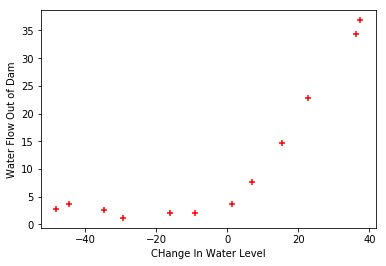

In [5]:
#plot
plt.scatter(X,y,marker="+",c="r")
plt.xlabel("CHange In Water Level")
plt.ylabel("Water Flow Out of Dam")
plt.show()

In [6]:
def costfunc(X,y,theta,Lambda):
    m=len(y)
    pred=X @ theta
    pa=(1/(2*m))*np.sum((pred-y)**2)
    reg=pa+(Lambda/(2*m))*np.sum((theta[1:]**2))
    #gradient
    grad0=(1/m)*(X.T @(pred-y))
    grad1=(1/m)*(X.T @ (pred-y))+(Lambda/m)*(theta)
    grad=np.vstack((grad0[0],grad1[1:]))
    
    return reg, grad

In [7]:
m=X.shape[0]
theta=np.ones((2,1))
X=np.hstack((np.ones((m,1)),X))
reg,grad=costfunc(X,y,theta,1)

In [8]:
reg

303.9931922202643

In [9]:
grad

array([[-15.30301567],
       [598.25074417]])

In [10]:
def gradient_descent(X,y,theta,alpha,itera,Lambda):
    m=len(y)
    cost_storage=[]
    for i in range(itera):
        cost,grad=costfunc(X,y,theta,Lambda)
        theta=theta-(alpha * grad)
        cost_storage.append(cost)
    return theta,cost_storage

In [11]:
theta_new,costs_new=gradient_descent(X,y,np.zeros((2,1)),0.001,4000,0)

In [12]:
theta_new

array([[12.81756012],
       [ 0.36615787]])

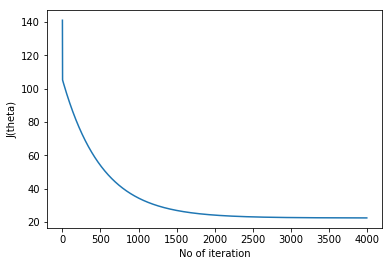

In [13]:
plt.plot(costs_new)
plt.xlabel("No of iteration")
plt.ylabel("J(theta)")
plt.show()

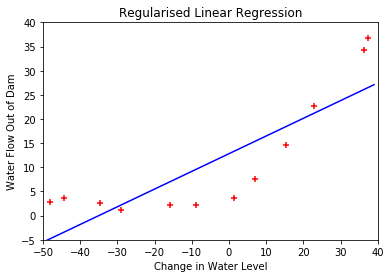

In [16]:
plt.scatter(X,y,marker="+",c="red")
plt.xlabel("Change in Water Level")
plt.ylabel("Water Flow Out of Dam")
X_va=[x for x in range(-50,40)]
Y_va=[y*theta_new[1]+theta_new[0] for y in X_va]
plt.plot(X_va,Y_va,c="b")
plt.ylim(-5,40)
plt.xlim(-50,40)
plt.title("Regularised Linear Regression")
plt.show()

In [17]:
#learning Curve

In [18]:
def learningcurve(X,y,X_vals,y_vals,Lambda):
    m=len(y)
    n=X.shape[1]
    error_val=[]
    error_train=[]
    for i in range(1,m+1):
        theta=gradient_descent(X[0:i,:],y[0:i,:],np.zeros((n,1)),0.001,3000,Lambda)[0]
        error_train.append(costfunc(X[0:i,:],y[0:i,:],theta,Lambda)[0])
        error_val.append(costfunc(X_vals,y_vals,theta,Lambda)[0])
    return error_train,error_val

In [19]:
m=X.shape[0]
X_new=np.hstack((np.ones((m,1)),X))
X_val_new=np.hstack((np.ones((21,1)),X_val))

In [20]:
train,val=learningcurve(X_new,y,X_val_new,y_val,0)

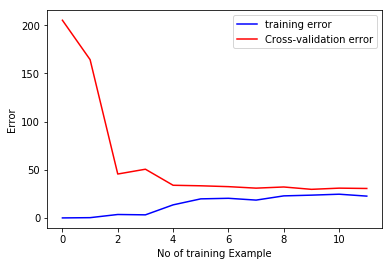

In [21]:
plt.plot(range(12),train,label="training error",c="b")
plt.plot(range(12),val,label="Cross-validation error",c="r")
plt.xlabel("No of training Example")
plt.ylabel("Error")
plt.legend(loc="best")
plt.show()

In [22]:
print(" i| train error           |  val error")
for i in range(1,10):
    print(i,"|",train[i-1],"|",val[i-1])
    print("---------------------------------------------")


 i| train error           |  val error
1 | 9.860761315262648e-32 | 205.1210957454735
---------------------------------------------
2 | 0.26667458269926014 | 164.2535605474932
---------------------------------------------
3 | 3.548185635907084 | 45.54817576824285
---------------------------------------------
4 | 3.1874889363749985 | 50.52763121765736
---------------------------------------------
5 | 13.543624507919134 | 33.8818916785026
---------------------------------------------
6 | 19.77082269208633 | 33.33501763960231
---------------------------------------------
7 | 20.35490053770414 | 32.44949025865311
---------------------------------------------
8 | 18.491367932249474 | 30.897434817077908
---------------------------------------------
9 | 22.864926631607062 | 32.09291116304466
---------------------------------------------


In [23]:
#polynomial features

In [24]:
data=loadmat("ex5data1.mat")

In [36]:
#split
X=data["X"]
y=data["y"]
X_val=data["Xval"]
y_val=data["yval"]
X_test=data["Xtest"]
y_test=data["ytest"]

In [26]:
def polyfeature(X,power):
    for i in range(2,power+1):
        X=np.hstack((X,(X[:,0]**i)[:,np.newaxis]))
    return X

In [27]:
def feature_normalization(X):
    X_mean=np.mean(X,axis=0)
    X_std=np.std(X,axis=0)
    z=(X-X_mean)/X_std
    return z,X_mean,X_std

In [28]:
X=polyfeature(X,8)

In [29]:
X_new,mean,std=feature_normalization(X)

In [30]:
X_new1=np.hstack((np.ones((X_new.shape[0],1)),X_new))

In [31]:
X_new1.shape

(12, 9)

In [32]:
def fnm(X,mean,std):
    z=(X-mean)/std
    return z

In [33]:
#make poly for cv set
X_val=polyfeature(X_val,8)
X_poly_val=feature_normalization(X_val)[0]
X_poly_val=np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

In [34]:
#make test poly
X_test=polyfeature(X_test,8)
X_poly_test=feature_normalization(X_test)[0]
X_poly_test=np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

In [35]:
theta_poly,cost_poly=gradient_descent(X_new1,y,np.zeros((9,1)),0.3,20000,0)

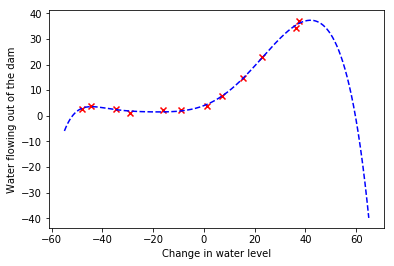

In [37]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)
x_value_poly = polyfeature(x_value[:,np.newaxis], 8)
#x_value_poly=feature_normalization(x_value_poly)
x_value_poly=fnm(x_value_poly,mean,std)
x_value_poly1 = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly1 @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()
#here error will come because we have to use traing data mean and std thats the reason i definded func

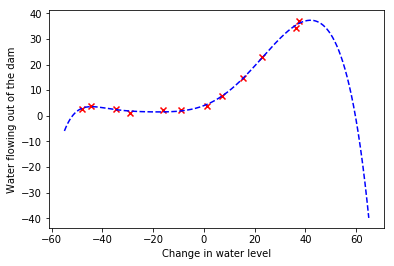

In [49]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)
x_value_poly = polyfeature(x_value[:,np.newaxis], 8)
#x_value_poly=feature_normalization(x_value_poly)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly1 = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly1 @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [144]:
#scikit

In [69]:
#split
X=data["X"]
y=data["y"]
X_val=data["Xval"]
y_val=data["yval"]
X_test=data["Xtest"]
y_test=data["ytest"]

In [40]:
# Map X onto Polynomial features and normalize
X_poly = polyfeature(X, 8)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_poly=sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))

In [41]:
X_poly_test = polyfeature(X_test, 8)
X_poly_test = sc_X.transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0],1)),X_poly_test))

In [42]:
# Map Xval onto polynomial features and normalize
X_poly_val = polyfeature(X_val, 8)
X_poly_val = sc_X.transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0],1)),X_poly_val))

In [43]:
theta_poly1, J_history_poly = gradient_descent(X_poly,y,np.zeros((9,1)),0.3,20000,0) 

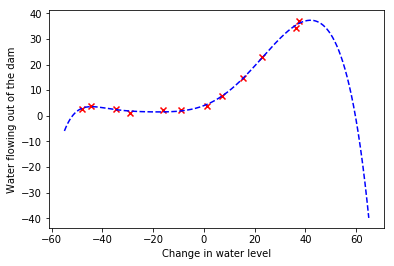

In [44]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)
x_value_poly = polyfeature(x_value[:,np.newaxis], 8)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [45]:
(theta_poly ==theta_poly1)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [46]:
cost_poly==J_history_poly

True

In [47]:
train_poly,val_poly=learningcurve(X_new1,y,X_poly_val,y_val,0)

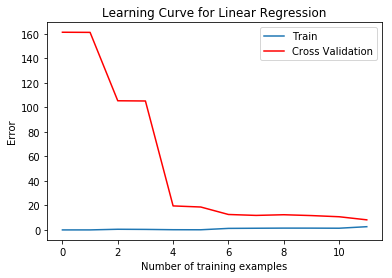

In [48]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [50]:
#now do all this for Lambda =1

In [70]:
theta_1,cost_1=gradient_descent(X_poly,y,np.zeros((9,1)),0.3,20000,1) 

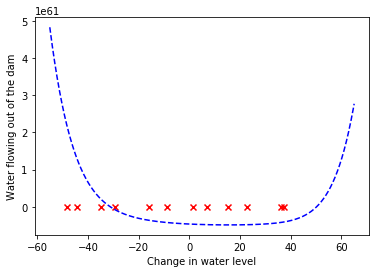

In [71]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)
x_value_poly = polyfeature(x_value[:,np.newaxis], 8)
x_value_poly=fnm(x_value_poly,mean,std)
x_value_poly1 = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly1 @ theta_1
plt.plot(x_value,y_value,"--",color="b")
plt.show()

In [61]:
train_poly,val_poly=learningcurve(X_new1,y,X_poly_val,y_val,1)

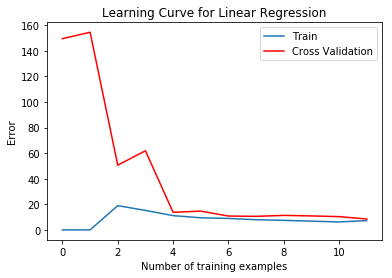

In [62]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [63]:
train_poly,val_poly=learningcurve(X_new1,y,X_poly_val,y_val,100)

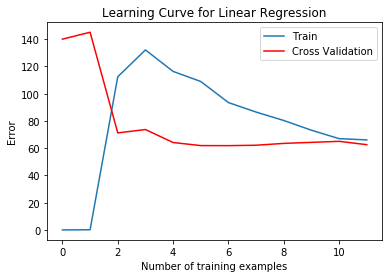

In [64]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [65]:
train_poly,val_poly=learningcurve(X_new1,y,X_poly_val,y_val,3)

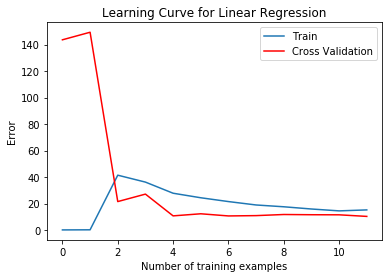

In [66]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()

In [67]:
train_poly,val_poly=learningcurve(X_new1,y,X_poly_val,y_val,0.01)

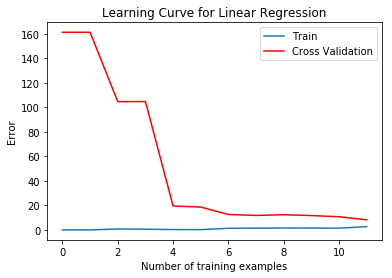

In [68]:
plt.plot(range(12),train_poly,label="Train")
plt.plot(range(12),val_poly,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()
plt.show()